# Project: Investigate a European Football DataBase - What makes a team win?
 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Football is the most followed sports globally. One very important aspect, the most important asppect infact is who might win the game. Each team sets different tactics and counter tactics, some teams prefer attacking others prefer to score one goal and defect. Some teams prefer fast and risky football other prefer slow paced, few but critical attacks to win the game. In some games, nothing counts, it is purely luck. From another point of view, teams with stronger players tend to control the game, defend less and creating a lot of scoring chances, weaker teams tend to be careful, move slowly and try to create few but critical finishes to score.  

After investigating the different databases this one gave me a lot of things to think about. Which style of play is better? Which style of play give on average the highest number of goals? does it matter if the team is playing home or away? Let's also consider an average team (based on FIFA ratings for example), they might be willing to play attacking football with weaker teams while they might be defensive against stronger teams. 

The data was downloaded from Kaggle website. I have installed SQLlite, and start writing queries from what I magically learned in this course. I have have viewed the data tried to understand how it is stored and in what data types. This data set has limited documentation and one needs to read and explore the tables to understand what is stored in each column. To start working with playing tactics, goals, matches and player attributes the two SQL queries were implemtned in SQLite. 






The 1st SQL code collects informtion about playing style (in classes), it also collects information about players who participated in the games.
The 2nd SQL code calculates the average player rating that will be later connected with the matches. The function average was used, because when I viewed the data I saw multiple player rating during a given year. To make my analysis easier I averaged the player rating in each year using the AVG () functuion in SQL.

The files are exported usng SQLlite to *.csv* which will be then read by PANDAS package of Python. 

The next step would be to import the data to Python using PANDAS. I also imported Numpy in case I needed to manipulate the data and Matplotlib for plotting figures.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
%matplotlib inline
# game data
matchdata_df = pd.read_csv("./all_match_data.csv")
matchdata_df.rename(columns={'year1':'year'}, 
                 inplace=True)


<a id='wrangling'></a>
## Data Wrangling
The data is uploaded, inspected from the CSV files visually. then pandas functions .info, .nunique() and head assured the data is clean

### General Properties

In [2]:
matchdata_df.nunique()


year                                         9
home_team_goal                              11
away_team_goal                              10
home_team_api_id                           299
match_api_id                             25979
home_player_1                              906
home_player_2                             2414
home_player_3                             2375
home_player_4                             2606
home_player_5                             2769
home_player_6                             3798
home_player_7                             3422
home_player_8                             4076
home_player_9                             4114
home_player_10                            3642
home_player_11                            2890
away_team_api_id                           299
away_player_1                              926
away_player_2                             2504
away_player_3                             2470
away_player_4                             2657
away_player_5

In [3]:
matchdata_df.tail()


,year,home_team_goal,away_team_goal,home_team_api_id,match_api_id,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,...,home_team_defenceTeamWidthClass,away_team_buildUp_playSpeedClass,away_team_buildUpPlayDribbingClass,away_team_buildUpPassingClass,away_team_chanceCreationPassingClass,away_team_chanceCreationCrossingClass,away_team_chanceCreationShootingClass,away_team_defencePressureClass,away_team_defenceAggressionClass,away_team_defenceTeamWidthClass
25974,2015,1,0,10190,1992091,42231.0,678384.0,95220.0,638592.0,413155.0,...,Normal,Balanced,Normal,Mixed,Normal,Normal,Normal,Medium,Press,Normal
25975,2015,1,2,9824,1992092,33272.0,41621.0,25813.0,257845.0,114735.0,...,Normal,Balanced,Normal,Mixed,Normal,Normal,Normal,Medium,Press,Normal
25976,2015,2,0,9956,1992093,157856.0,274779.0,177689.0,294256.0,42258.0,...,Normal,Balanced,Normal,Mixed,Normal,Normal,Normal,Medium,Press,Normal
25977,2015,0,0,7896,1992094,NaN,8881.0,173534.0,39646.0,282287.0,...,NaN,Balanced,Normal,Mixed,Normal,Normal,Normal,Medium,Press,Normal
25978,2015,4,3,10192,1992095,274787.0,492132.0,108451.0,25815.0,94553.0,...,Normal,Balanced,Normal,Mixed,Normal,Normal,Normal,Medium,Press,Normal


In [4]:
import pandas as pd
player_rating_df = pd.read_csv("./player_rating.csv")
player_rating_df.rename(columns={'AVG(pa.overall_rating)':'player_rating'}, 
                 inplace=True)

player_rating_df.head()



,player_api_id,year,player_rating
0,2625,2007,63.0
1,2625,2008,60.0
2,2625,2010,60.0
3,2625,2011,58.5
4,2625,2012,58.0


In [5]:
home_team_api = matchdata_df.loc[:,'home_player_1':'home_player_11']
away_team_api = matchdata_df.loc[:,'away_player_1':'away_player_11']  

In [12]:
# We need to calculate the average team performance level from the average rating of the players
matchdata_withratings = matchdata_df
def addrating(player,matches_data_frame,ratings_data_frame):
    ''' This function will add the player rating'''
    matches_data_frame =  pd.merge(matches_data_frame, ratings_data_frame, how='left', left_on=[player,'year'], copy=False, right_on=['player_api_id','year'], suffixes=['','_'+player])
   
    return matches_data_frame


# add home players
for i in home_team_api:
    matchdata_withratings = addrating(i,matchdata_withratings,player_rating_df)
    
for j in away_team_api:
    matchdata_withratings = addrating(j,matchdata_withratings,player_rating_df)

matchdata_withratings.keys()

Index(['year', 'home_team_goal', 'away_team_goal', 'home_team_api_id',
       'match_api_id', 'home_player_1', 'home_player_2', 'home_player_3',
       'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7',
       'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11',
       'away_team_api_id', 'away_player_1', 'away_player_2', 'away_player_3',
       'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
       'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11',
       'home_team_buildUp_playSpeedClass',
       'home_team_buildUpPlayDribbingClass', 'home_team_buildUpPassingClass',
       'home_team_chanceCreationPassingClass',
       'home_team_chanceCreationCrossingClass',
       'home_team_chanceCreationShootingClass',
       'home_team_defencePressureClass', 'home_team_defenceAggressionClass',
       'home_team_defenceTeamWidthClass', 'away_team_buildUp_playSpeedClass',
       'away_team_buildUpPlayDribbingClass', 'away_tea

In [14]:
matchdata_withratings['home_team_avg_rating'] = matchdata_withratings[['player_rating', 'player_rating_home_player_2', 'player_rating_home_player_3', 'player_rating_home_player_4', 'player_rating_home_player_5', 'player_rating_home_player_6', 'player_rating_home_player_7', 'player_rating_home_player_8', 'player_rating_home_player_9', 'player_rating_home_player_10', 'player_rating_home_player_11']].mean(axis=1)
matchdata_withratings['away_team_avg_rating'] = matchdata_withratings[['player_rating_away_player_1', 'player_rating_away_player_2', 'player_rating_away_player_3', 'player_rating_away_player_4', 'player_rating_away_player_5', 'player_rating_away_player_6', 'player_rating_away_player_7', 'player_rating_away_player_8', 'player_rating_away_player_9', 'player_rating_away_player_10', 'player_rating_away_player_11']].mean(axis=1)
matchdata_withratings['goal_diff'] =matchdata_withratings['home_team_goal']-matchdata_withratings['away_team_goal']
matchdata_withratings['rating_diff'] =matchdata_withratings['home_team_avg_rating']-matchdata_withratings['away_team_avg_rating']

In [16]:
matchdata_withratings.head()


,year,home_team_goal,away_team_goal,home_team_api_id,match_api_id,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,...,player_api_id_away_player_9,player_rating_away_player_9,player_api_id_away_player_10,player_rating_away_player_10,player_api_id_away_player_11,player_rating_away_player_11,home_team_avg_rating,away_team_avg_rating,goal_diff,rating_diff
0,2008,1,1,9987,492473,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2008,0,0,10000,492474,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2008,0,3,9984,492475,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3,NaN
3,2008,5,0,9991,492476,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
4,2008,1,3,7947,492477,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,NaN




### Data Cleaning 
The data was inspected visually, it does't need cleaning. the functions df_nunique() and .items was used to check the number of unique values and some values of each table. We can say that the data needs no further cleaning. However for some part of the analysis NAN values will be deleted and that will be explained later on.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 What are the most common tactics used in modern european football?
To answer this questions I will plot a pie chart for each of the data sets I have and for each type of tactics obtained from the data set. I will be using home team info as eurpean leagues are played in two legs format, so each game is played twice once on one team's home stadium and the other on the other team's home stadium.



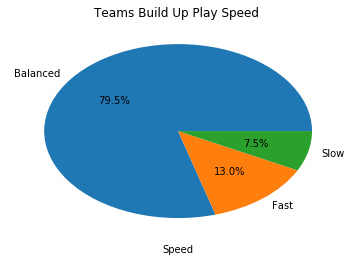

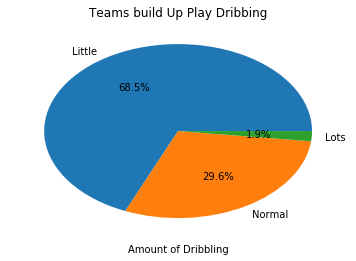

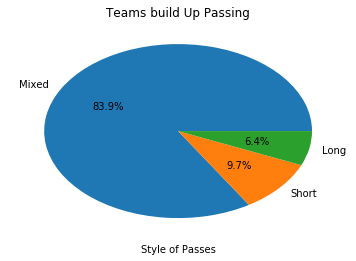

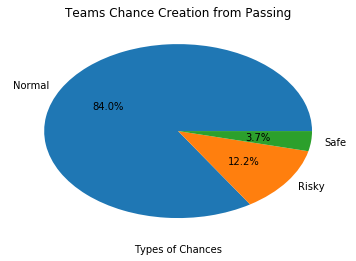

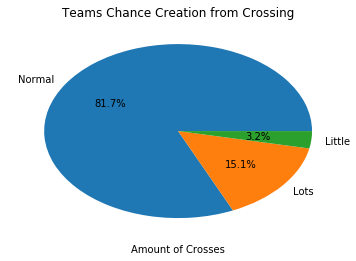

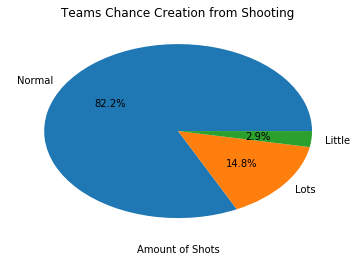

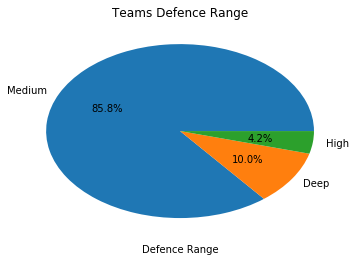

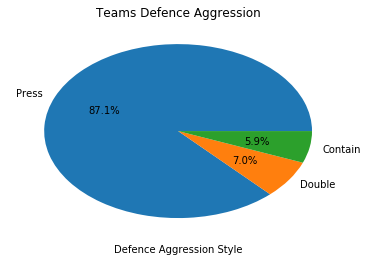

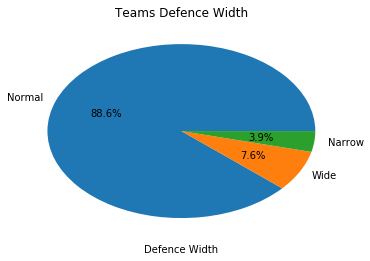

In [88]:

g=matchdata_withratings['home_team_buildUp_playSpeedClass'].value_counts();
plt.pie(g,labels=g.keys(),autopct='%.1f%%');
plt.title('Teams Build Up Play Speed ');
plt.xlabel('Speed');
plt.show();

g=matchdata_withratings.home_team_buildUpPlayDribbingClass.value_counts();
plt.pie(g,labels=g.keys(),autopct='%.1f%%');
plt.title('Teams build Up Play Dribbing');
plt.xlabel('Amount of Dribbling');
plt.show();

g=matchdata_withratings.home_team_buildUpPassingClass.value_counts();
plt.pie(g,labels=g.keys(),autopct='%.1f%%');
plt.title('Teams build Up Passing');
plt.xlabel('Style of Passes');
plt.show();


g=matchdata_withratings.home_team_chanceCreationPassingClass.value_counts();
plt.pie(g,labels=g.keys(),autopct='%.1f%%');
plt.title('Teams Chance Creation from Passing');
plt.xlabel('Types of Chances');
plt.show();

g=matchdata_withratings.home_team_chanceCreationCrossingClass.value_counts();
plt.pie(g,labels=g.keys(),autopct='%.1f%%');
plt.title('Teams Chance Creation from Crossing');
plt.xlabel('Amount of Crosses');
plt.show();

g=matchdata_withratings.home_team_chanceCreationShootingClass.value_counts();
plt.pie(g,labels=g.keys(),autopct='%.1f%%');
plt.title('Teams Chance Creation from Shooting');
plt.xlabel('Amount of Shots');
plt.show();

g=matchdata_withratings.home_team_defencePressureClass.value_counts();
plt.pie(g,labels=g.keys(),autopct='%.1f%%');
plt.title('Teams Defence Range');
plt.xlabel('Defence Range');
plt.show();

g=matchdata_withratings.home_team_defenceAggressionClass.value_counts();
plt.pie(g,labels=g.keys(),autopct='%.1f%%');
plt.title('Teams Defence Aggression');
plt.xlabel('Defence Aggression Style');
plt.show();

g=matchdata_withratings.home_team_defenceTeamWidthClass.value_counts();
plt.pie(g,labels=g.keys(),autopct='%.1f%%');
plt.title('Teams Defence Width');
plt.xlabel('Defence Width');
plt.show();


The results shows that modern european football is characterized by moderate build up speed in play, little dribbling, mixed passing, average rist in passing, moderate level of crosses and chances from shooting. While Defence is characterized by midium range, usually pressing on the opponent and defence players are neither close or far from each other, a moderate distance.
To calcuate the teams applying these tactics we apply the following code:

In [107]:
matchdata_withratings[(matchdata_withratings.home_team_buildUp_playSpeedClass == 'Balanced') & (matchdata_withratings.home_team_buildUpPlayDribbingClass == 'Little') & (matchdata_withratings.home_team_buildUpPassingClass == 'Mixed') & (matchdata_withratings.home_team_chanceCreationPassingClass == 'Normal') & (matchdata_withratings.home_team_chanceCreationCrossingClass == 'Normal') & (matchdata_withratings.home_team_chanceCreationShootingClass == 'Normal') & (matchdata_withratings.home_team_defencePressureClass == 'Medium') & (matchdata_withratings.home_team_defenceAggressionClass == 'Press') & (matchdata_withratings.home_team_defenceTeamWidthClass == 'Normal') ].match_api_id.count() / matchdata_withratings.match_api_id.count()


0.19850648600792947

So about 19% of the matches played were using all the main tactics options.

### Research Question 2: Is there a connection between the difference in ratings between the home and away team and goal difference between them?

In few more words, FIFA rating for each team which was earlier calculated from each player participating in the game. Can it be used to predict who win and by how much goal differences. For this analysis I will be using the 'goal_diff'	and 'rating_diff' columns I calculated earlier.
1st I will examin the histograms for each of these variables to explore them.

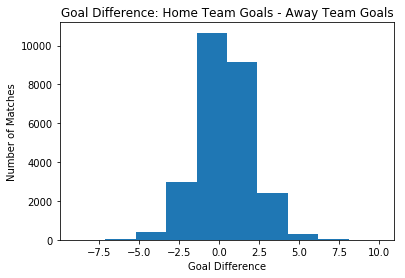

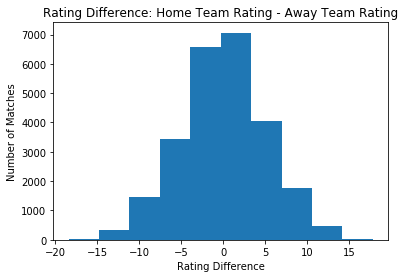

In [115]:
plt.hist(matchdata_withratings['goal_diff'].dropna());
plt.title('Goal Difference: Home Team Goals - Away Team Goals');
plt.xlabel('Goal Difference');
plt.ylabel('Number of Matches');
plt.show();


plt.hist(matchdata_withratings['rating_diff'].dropna())
plt.title('Rating Difference: Home Team Rating - Away Team Rating');
plt.xlabel('Rating Difference');
plt.ylabel('Number of Matches');
plt.show();

It can be seen that this goal difference is skewed to the right, indicating home teams usually have an advantage. Furthermore, the most famous score is a tie with goal difference = 0. 
Ratings histogram shows that in some leagues there is a difference up to 20 between the teams. it is normally distributed as expected for a large set of data points. There might be a small impact of the NaN values that have been eliminated from the figure. 
To explore the connection between the two variables, we can apply the scatter plot and calculate the pearson correlation.

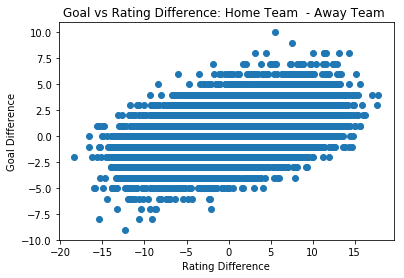

,rating_diff,goal_diff
rating_diff,1.000000,0.430134
goal_diff,0.430134,1.000000


In [135]:
plt.scatter(matchdata_withratings['rating_diff'],matchdata_withratings['goal_diff']);
plt.title('Goal vs Rating Difference: Home Team  - Away Team ');
plt.xlabel('Rating Difference');
plt.ylabel('Goal Difference');
plt.show();

g = matchdata_withratings.loc[:,['rating_diff','goal_diff']].dropna()
g.corr(method='pearson')

The scatter diagram and the pearson correlation shows there is somehow a weak correlation between the average individual player rating of a team and the goal difference. This implies that coach's tactics have an impact on the result, maybe other factors also like harmony, morale, pressure from important games and surely luck!. All of these need to be part of the model if we want to predict the final result.

<a id='conclusions'></a>
## Conclusions

In this small project we have explored the most used tactics in european football. It was concluded 19% only share the most common features. Maybe during other times (in the future) different style emerges. 
The second question was about understanding the relationship between final result (goal difference) and (player ratings from FIFA) and concluded there is a correlation but it is not strong enough, as it is not the only factor 


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])